In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import cmocean
pi = np.pi

\begin{align*}
    \Psi&=\frac{f_0w_0L}{2\beta H}\\
    \psi_B\left(x\right) &= -\Psi\left(1-\frac{x}{L}\right)\sin\left(\frac{\pi y}{L}\right)\mathcal{H}(t)\\
    &= -\Psi\left(1-x'\right)\sin\left(\pi y'\right)\mathcal{H}(t)
\end{align*}

Where $\left(x,y\right)=L\left(x',y'\right)$. Next, draw contours of $f(x,y)=cy+\psi_B(x,y)=\left(cL\right)y'+\psi_B(x,y)$, where $c=\frac{\beta}{2F}=\frac{\beta g' H}{2 f_0^2}$. Let $A=\frac{cL}{\Psi}$.

 Units of $\Psi$: $\frac{s^{-1}m~s^{-1}m}{m^{-1}s^{-1}m}=\frac{m^2s^{-2}}{s^{-1}}=m^2s^{-1}$. Units of $c$: $\frac{m^{-1}s^{-1} m~s^{-2}m}{s^{-2}}$

In [17]:
L      = 3e6   # 3000 km
beta   = 2e-11 # 1/(m*s)
H      = 5e2   # m (depth of each layer)
gprime = 1e-2  # units: m/s^2; computed as g*(rho1-rho2)/rho1
f0     = 1e-4  # 1/s
w0     = pi * 10 * 1/365 * 1/86400 # (10 * pi) m/year * (year/365 days) * (day/86400 sec)

F   = f0**2/(gprime*H)
c   = beta/(2*F)
Psi = f0*w0*L/(2*beta*H)

# Note: x,y defined below are non-dimensionalized by L
x,y = np.meshgrid(np.linspace(0,1), np.linspace(-1,1))

psi_B = -Psi*(1-x)*np.sin(pi*y)
f     = c*L*y + psi_B

In [18]:
print(c*L/Psi)

1.003822057069202


In [24]:
(psi_B/Psi).max()

0.9994862162006879

In [28]:
c*L

14999.999999999998

In [26]:
(c*L*y/(c*L)).max()

1.0

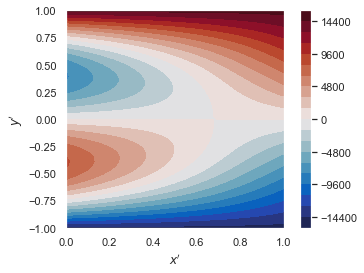

In [21]:
fig,ax = plt.subplots()
ax.set_aspect(.5)
p = ax.contourf(x,y, f, cmap='cmo.balance', levels=np.arange(-1.6e4,1.6e4+1.6e3,1.6e3))
cb = fig.colorbar(p, fraction=.04)
ax.set_xlabel(r"$x'$")
ax.set_ylabel(r"$y'$")
plt.show()